 # PROBLEM STATEMENT : 
 A COMPANY ,SIGMA CABS HAS ROLLED OUT ITS CARS TO THE MARKET AND LOOKS TO EXPAND BUT IT LACKS INSIGHTS
 AS TO HOW TO CHARGE SURGE PRICES . THE FOLLOWING PROJECT AIMS AT SOLVING THIS PROBLEM BY PREDICTING SURGE TYPE PRICE AND DISTANCE BASED ON VARIOUS FACTORS SUCH AS 
     .Life Style Index
     .Confidence Lifestyle index
     .Gender
     .Cancellations among other factors

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\Datasets\sigma_cabs\sigma_cabs.csv")

In [3]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [4]:
df.drop(['Trip_ID','Var1'],axis=1,inplace=True)

In [5]:
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,B,1.0,2.42769,A,A,3.90500,0,46,60,Female,2
1,29.47,B,10.0,2.78245,B,A,3.45000,0,56,78,Male,2
2,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,56,77,Male,2
3,61.56,C,10.0,NaN,NaN,A,3.45375,0,52,74,Male,3
4,54.95,C,10.0,3.03453,B,A,3.40250,4,49,102,Male,2


In [6]:
df.isnull().sum()

Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [7]:
df['Type_of_Cab'].value_counts().head(10)

B    31136
C    28122
A    21569
D    18991
E    11634
Name: Type_of_Cab, dtype: int64

In [8]:
df['Type_of_Cab'] = df['Type_of_Cab'].fillna('F')

In [9]:
df.isnull().sum()

Trip_Distance                      0
Type_of_Cab                        0
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [10]:
df['Life_Style_Index'].value_counts().head(10)

2.70697    14
2.77608    14
2.78465    13
2.78388    12
2.77447    12
2.69489    12
2.77256    12
2.78127    12
2.90294    11
2.77533    11
Name: Life_Style_Index, dtype: int64

In [11]:
df['Life_Style_Index'] = df['Life_Style_Index'].fillna(df['Life_Style_Index'].mean())
df['Confidence_Life_Style_Index'] = df['Confidence_Life_Style_Index'].fillna('B')

In [12]:
df['Confidence_Life_Style_Index'].value_counts().head(10)

B    60548
C    35967
A    35147
Name: Confidence_Life_Style_Index, dtype: int64

In [13]:
df['Customer_Since_Months'] = df['Customer_Since_Months'].fillna(0)

In [14]:
df['Customer_Rating'] = np.round(df['Customer_Rating'])

In [15]:
df.isnull().sum()

Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

In [16]:
df.dtypes

Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

# DATA ANALYSIS

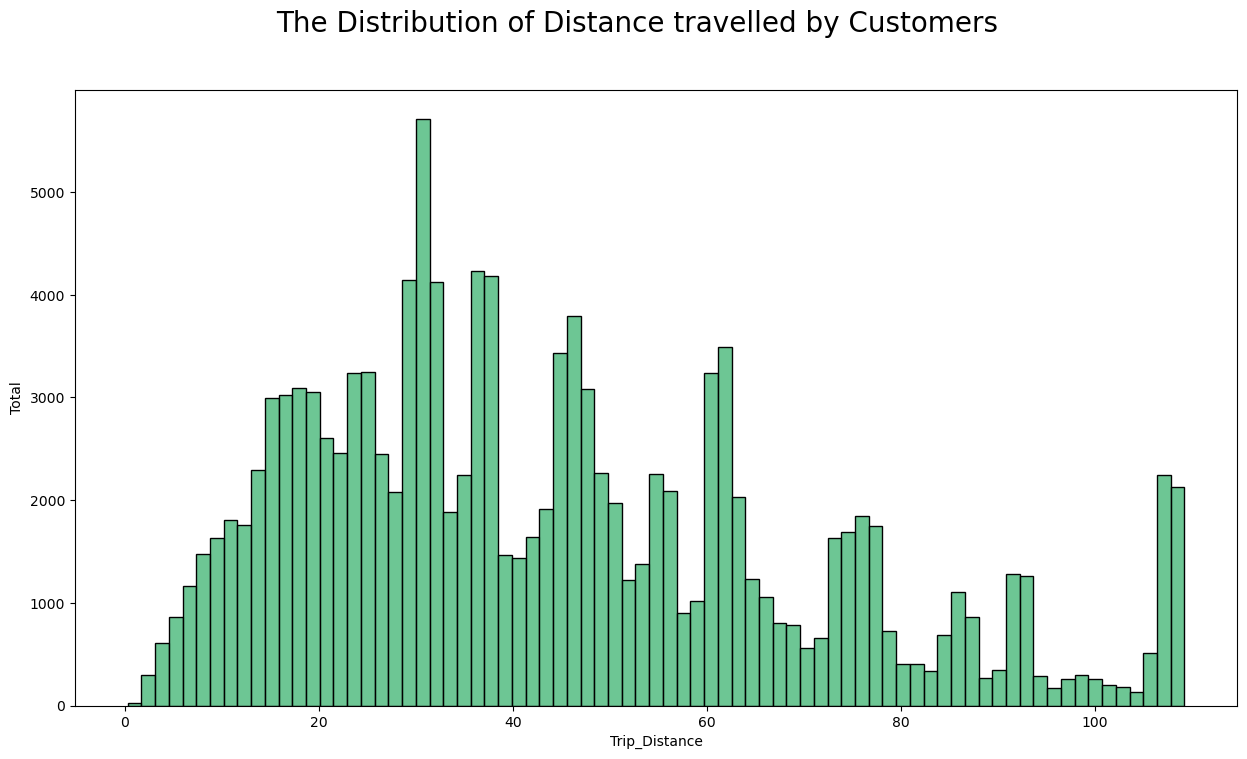

In [17]:
# Distribution of distance
fig = plt.figure(figsize=(15,8))
fig.suptitle('The Distribution of Distance travelled by Customers',size=20)
sns.histplot(x='Trip_Distance',data=df,color='mediumseagreen')
plt.ylabel('Total')
plt.show()
# A majority of customers travel 30 miles ,t

In [18]:
df.columns

Index(['Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
       'Surge_Pricing_Type'],
      dtype='object')

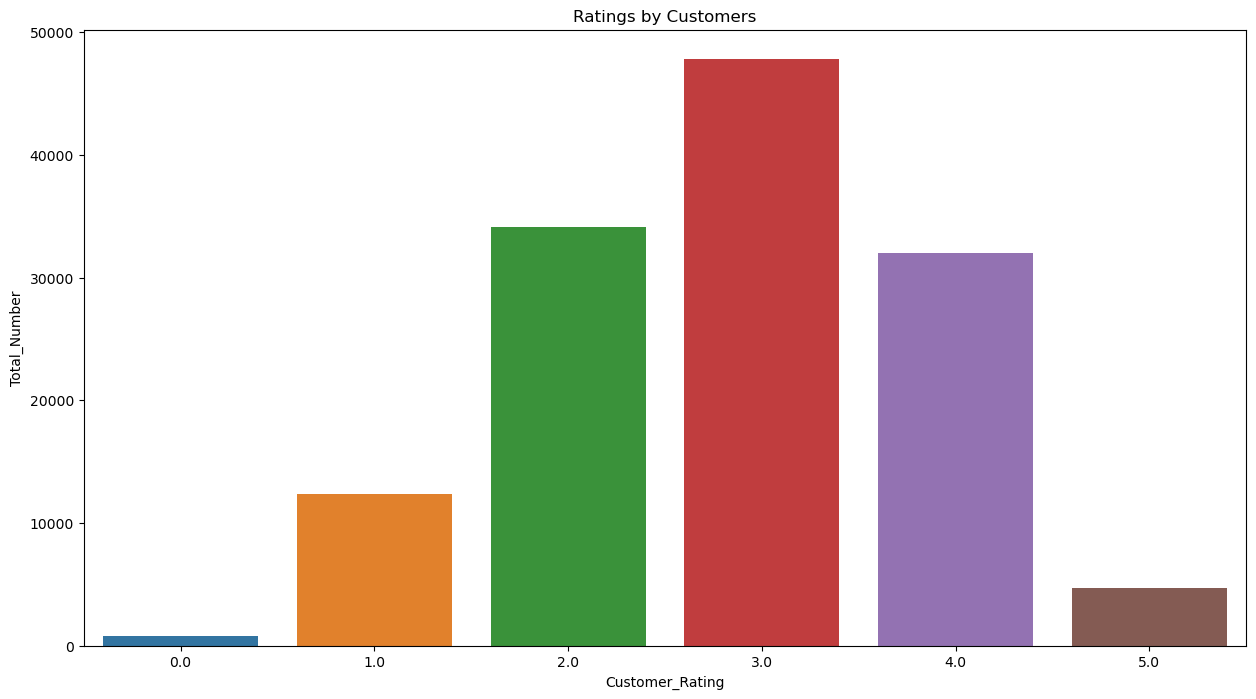

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(x='Customer_Rating',data=df)
plt.ylabel('Total_Number')
plt.title('Ratings by Customers')
plt.show()
# A good number rated the cabs as 3/5 ,due to novelty??

In [20]:
df['Destination_Type'].value_counts().head()

A    77597
B    29555
C     7484
D     6588
E     2717
Name: Destination_Type, dtype: int64

In [21]:
df.groupby('Destination_Type')['Customer_Rating'].agg('mean')
# The 3 Most common destination gave a 3 star rating

Destination_Type
A    2.761730
B    2.810827
C    3.199091
D    3.050091
E    3.311005
F    3.300000
G    3.395567
H    2.984921
I    3.137761
J    3.008633
K    3.229412
L    3.311042
M    3.247312
N    3.530612
Name: Customer_Rating, dtype: float64

In [22]:
df.groupby('Destination_Type')['Trip_Distance'].agg('mean')
# For destination N,we can assume that since it is a shorter distance it has received more rating 4:

Destination_Type
A    46.635770
B    45.517439
C    42.962588
D    29.641900
E    32.003544
F    46.445538
G    25.405561
H    27.206849
I    22.498647
J    19.405079
K    32.805941
L    46.542830
M    34.750860
N    18.638776
Name: Trip_Distance, dtype: float64

In [23]:
# Which destinations tend to cancel a lot of their trips??
df.groupby('Destination_Type')['Cancellation_Last_1Month'].agg('sum')
# A lot  of trip cancellations from destination A ,could it be because of the rating?


Destination_Type
A    59706
B    20794
C     7457
D     5432
E     2470
F     1996
G     1224
H     1022
I      721
J      568
K      644
L      857
M       86
N       93
Name: Cancellation_Last_1Month, dtype: int64

In [24]:
# Which gender is in what destination? I will focus on the 3 most popular destination ; A,B and C
df[df['Destination_Type']=='A']['Gender'].value_counts()

Male      55373
Female    22224
Name: Gender, dtype: int64

In [25]:
df[df['Destination_Type']=='B']['Gender'].value_counts()

Male      21022
Female     8533
Name: Gender, dtype: int64

In [26]:
df[df['Destination_Type']=='C']['Gender'].value_counts()

Male      5410
Female    2074
Name: Gender, dtype: int64

In [27]:
# In all the three destinations ,the main clients are male .Destination A seems to be the main client base 

# Gender as a factor

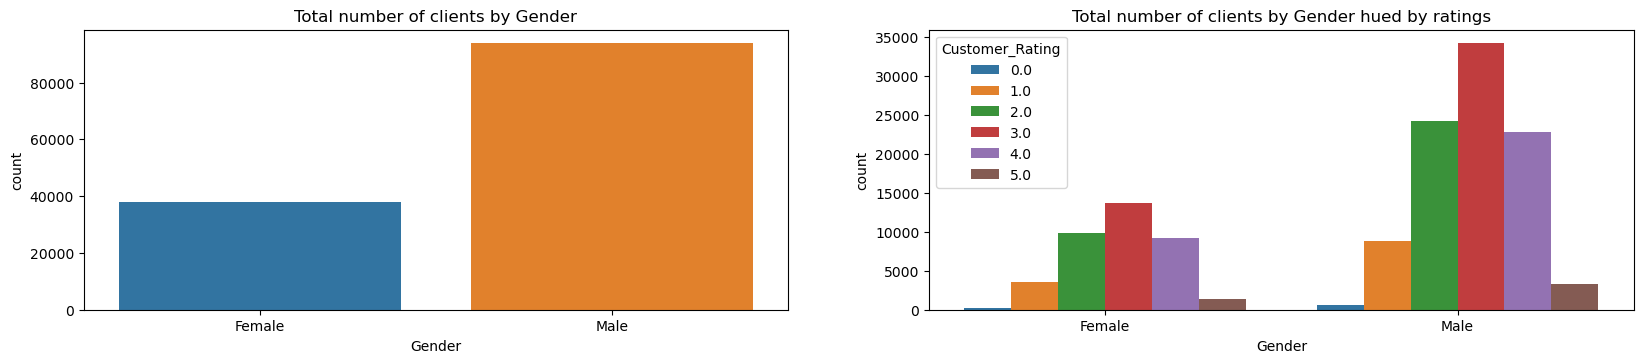

In [28]:
fig = plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.countplot(x='Gender',data=df)
plt.title('Total number of clients by Gender')
plt.subplot(2,2,2)
sns.countplot(x='Gender',data=df,hue='Customer_Rating')
plt.title('Total number of clients by Gender hued by ratings')
plt.show()
# Sigma cabs has more male than female clients .Both sexes had a majority rating of 3 stars

In [29]:
# Which gender has been a customer for a long time
df.groupby('Gender')['Customer_Since_Months'].agg('sum')
# Males have been sigma cabs main clients in comparison to females

Gender
Female    216765.0
Male      539782.0
Name: Customer_Since_Months, dtype: float64

In [30]:
df.groupby('Gender')['Customer_Since_Months'].agg('mean')
# Both sexes average six months as clients

Gender
Female    5.740294
Male      5.748477
Name: Customer_Since_Months, dtype: float64

In [31]:
# Who is most likely to cancel their trips 
df.groupby('Gender')['Cancellation_Last_1Month'].agg('sum')
# Males are most likely to cancel their trips,from destination A as with our previous findings

Gender
Female    29419
Male      73651
Name: Cancellation_Last_1Month, dtype: int64

# Surge Pricing Type : Indepth insights

In [32]:
df.columns

Index(['Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
       'Surge_Pricing_Type'],
      dtype='object')

In [33]:
df['Surge_Pricing_Type'].value_counts().head()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

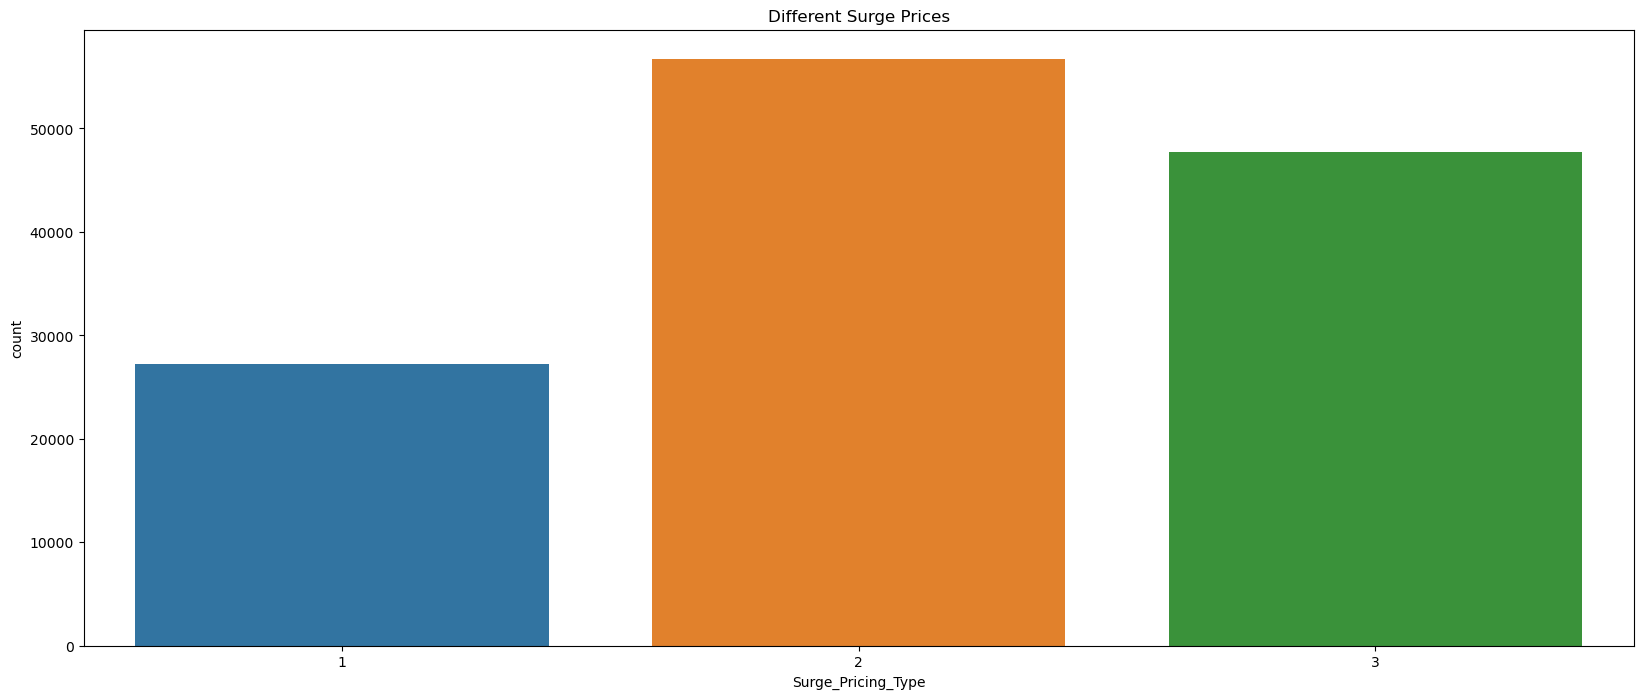

In [34]:
plt.figure(figsize=(20,8))
sns.countplot(x='Surge_Pricing_Type',data=df)
plt.title('Different Surge Prices')
plt.show()

In [35]:
df.groupby('Surge_Pricing_Type')['Cancellation_Last_1Month'].agg('sum').sort_values(ascending=False)
# A whole of the cancelled trips were those on Surge Pricing strategy 3

Surge_Pricing_Type
3    48822
2    40199
1    14049
Name: Cancellation_Last_1Month, dtype: int64

In [36]:
df.groupby('Surge_Pricing_Type')['Destination_Type'].value_counts()
# Destination A has surge pricing 2 as a commonality ? What could it mean??

Surge_Pricing_Type  Destination_Type
1                   A                   13752
                    B                    8477
                    C                    1778
                    D                     860
                    E                     820
                    G                     529
                    F                     263
                    H                     178
                    K                     164
                    L                     131
                    J                     113
                    I                      99
                    N                      31
                    M                      19
2                   A                   33913
                    B                   13681
                    C                    3093
                    D                    2260
                    E                    1101
                    F                     626
                    G                     5

In [37]:
df.groupby('Surge_Pricing_Type')['Trip_Distance'].agg('mean').sort_values(ascending=False)
#  Surge pricing could be distance specific

Surge_Pricing_Type
3    49.476234
2    41.269265
1    41.061633
Name: Trip_Distance, dtype: float64

# Label encoding ,Correlation and pre-modelling

In [38]:
# It will be a  good thing to know the continous and categorical variables
# The categorical variables will be all those with fewer data points
for column in df.columns:
    print(f"The total number of data points in:{column}  is| {df[column].nunique()}")

The total number of data points in:Trip_Distance  is| 10326
The total number of data points in:Type_of_Cab  is| 6
The total number of data points in:Customer_Since_Months  is| 11
The total number of data points in:Life_Style_Index  is| 55979
The total number of data points in:Confidence_Life_Style_Index  is| 3
The total number of data points in:Destination_Type  is| 14
The total number of data points in:Customer_Rating  is| 6
The total number of data points in:Cancellation_Last_1Month  is| 9
The total number of data points in:Var2  is| 58
The total number of data points in:Var3  is| 96
The total number of data points in:Gender  is| 2
The total number of data points in:Surge_Pricing_Type  is| 3


In [39]:
cat_features = ['Type_of_Cab','Customer_Since_Months','Confidence_Life_Style_Index','Destination_Type','Gender']

In [40]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = {}
for features in cat_features:
    lbl_encoder[features] = LabelEncoder()
    df[features] = lbl_encoder[features].fit_transform(df[features])

In [41]:
df.dtypes

Trip_Distance                  float64
Type_of_Cab                      int32
Customer_Since_Months            int64
Life_Style_Index               float64
Confidence_Life_Style_Index      int32
Destination_Type                 int32
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var2                             int64
Var3                             int64
Gender                           int32
Surge_Pricing_Type               int64
dtype: object

In [42]:
df.corr()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type
Trip_Distance,1.000000,0.047838,0.132611,0.468367,0.224798,-0.171064,-0.053943,-0.007686,0.200456,0.231706,0.002173,0.135928
Type_of_Cab,0.047838,1.000000,0.004863,-0.031677,0.059270,-0.000140,-0.064007,0.066166,-0.001421,-0.017322,0.000845,0.359014
Customer_Since_Months,0.132611,0.004863,1.000000,0.163024,0.021318,-0.055147,-0.033658,-0.003417,0.055878,0.111716,0.000985,0.022959
Life_Style_Index,0.468367,-0.031677,0.163024,1.000000,0.119489,-0.022695,0.181595,0.068176,0.215921,0.303296,0.000653,-0.073682
Confidence_Life_Style_Index,0.224798,0.059270,0.021318,0.119489,1.000000,-0.039013,-0.059462,0.028031,0.044439,0.055519,0.005123,0.115344
Destination_Type,-0.171064,-0.000140,-0.055147,-0.022695,-0.039013,1.000000,0.130118,0.047085,-0.093573,-0.079056,-0.003070,0.012152
Customer_Rating,-0.053943,-0.064007,-0.033658,0.181595,-0.059462,0.130118,1.000000,0.004513,-0.290762,-0.218017,0.001061,-0.150138
Cancellation_Last_1Month,-0.007686,0.066166,-0.003417,0.068176,0.028031,0.047085,0.004513,1.000000,0.095830,0.128686,0.002307,0.185646
Var2,0.200456,-0.001421,0.055878,0.215921,0.044439,-0.093573,-0.290762,0.095830,1.000000,0.683437,0.003183,0.003437
Var3,0.231706,-0.017322,0.111716,0.303296,0.055519,-0.079056,-0.218017,0.128686,0.683437,1.000000,0.003520,-0.039309


# ARTIFICIAL INTELLIGENCE : MACHINE AND DEEP LEARNING THROUGH EMBEDDINGS

# Machine Learning::

In [43]:
df.columns

Index(['Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
       'Surge_Pricing_Type'],
      dtype='object')

In [44]:
X = df.drop(['Surge_Pricing_Type'],axis=1)
y = df['Surge_Pricing_Type']

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [46]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,mean_squared_error
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rf_predict  = rfc.predict(X_test)
print(f"The classification report is:{classification_report(y_test,rf_predict)}")
print("====================================================================")

The classification report is:              precision    recall  f1-score   support

           1       0.72      0.56      0.63      5405
           2       0.67      0.77      0.72     11385
           3       0.70      0.66      0.68      9543

    accuracy                           0.69     26333
   macro avg       0.70      0.67      0.68     26333
weighted avg       0.69      0.69      0.69     26333



In [47]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_predict  = rfc.predict(X_test)
print(mean_squared_error(y_test,rfr_predict))

0.4585121330649755


In [48]:
dfc = DecisionTreeClassifier()
dfc.fit(X_train,y_train)
dfc_predict  = dfc.predict(X_test)
print(f"The classification report is:{classification_report(y_test,dfc_predict)}")
print("====================================================================")

The classification report is:              precision    recall  f1-score   support

           1       0.49      0.51      0.50      5405
           2       0.60      0.59      0.59     11385
           3       0.59      0.59      0.59      9543

    accuracy                           0.57     26333
   macro avg       0.56      0.56      0.56     26333
weighted avg       0.57      0.57      0.57     26333



In [49]:
print(rf_predict[:10])
print(rfr_predict[:10])
print(dfc_predict[:10])

[3 1 2 3 3 3 3 2 2 2]
[3 1 2 3 3 3 3 2 2 2]
[3 2 2 1 2 1 3 3 2 3]


# DEEP LEARNING ,LINEAR LAYER ,EMBEDDING LAYER

In [50]:
import torch
from torch import nn
import torch.nn.functional as F

In [51]:
X.shape

(131662, 11)

In [52]:
y.shape

(131662,)

In [53]:
X = X.values
y = y.values.reshape(-1,1)

In [54]:
X

array([[ 6.77,  1.  ,  1.  , ..., 46.  , 60.  ,  0.  ],
       [29.47,  1.  , 10.  , ..., 56.  , 78.  ,  1.  ],
       [41.58,  5.  , 10.  , ..., 56.  , 77.  ,  1.  ],
       ...,
       [40.17,  2.  , 10.  , ..., 48.  , 75.  ,  0.  ],
       [46.88,  1.  ,  4.  , ..., 54.  , 79.  ,  1.  ],
       [31.96,  0.  ,  7.  , ..., 57.  , 85.  ,  1.  ]])

In [55]:
y

array([[2],
       [2],
       [2],
       ...,
       [2],
       [2],
       [1]], dtype=int64)

In [102]:
class Sigma(nn.Module):
    def __init__(self,input_dim=11,hidden_dim=22,output_dim=3):
        super().__init__()
        self.linear_layer1 = nn.Linear(input_dim,hidden_dim)
        self.linear_layer2 = nn.Linear(hidden_dim,hidden_dim)
        self.linear_3 = nn.LazyLinear(hidden_dim,hidden_dim)
        self.out = nn.Linear(hidden_dim,output_dim)
        
        
    def forward(self,x:torch.tensor):
        x = self.linear_layer1(x)
        x= self.linear_layer2(x)
        x = self.linear_3(x)
        x= self.out(x)
        return x

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,shuffle=True)

In [104]:
X_train[:4]

array([[49.48    ,  3.      ,  0.      ,  2.56718 ,  1.      ,  0.      ,
         1.      ,  1.      , 46.      , 69.      ,  1.      ],
       [16.88    ,  5.      , 10.      ,  2.802064,  1.      ,  9.      ,
         4.      ,  2.      , 57.      , 83.      ,  1.      ],
       [48.98    ,  5.      ,  1.      ,  2.97536 ,  1.      ,  1.      ,
         3.      ,  0.      , 51.      , 78.      ,  1.      ],
       [16.3     ,  4.      ,  2.      ,  2.63349 ,  2.      ,  0.      ,
         3.      ,  0.      , 46.      , 65.      ,  0.      ]])

In [105]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)
y_test = torch.from_numpy(y_test).type(torch.LongTensor)

In [106]:
X_train

tensor([[49.4800,  3.0000,  0.0000,  ..., 46.0000, 69.0000,  1.0000],
        [16.8800,  5.0000, 10.0000,  ..., 57.0000, 83.0000,  1.0000],
        [48.9800,  5.0000,  1.0000,  ..., 51.0000, 78.0000,  1.0000],
        ...,
        [76.2100,  0.0000, 10.0000,  ..., 49.0000, 70.0000,  1.0000],
        [68.2000,  5.0000,  7.0000,  ..., 49.0000, 73.0000,  1.0000],
        [23.3300,  4.0000,  5.0000,  ..., 51.0000, 84.0000,  1.0000]])

In [107]:
y_train

tensor([[3],
        [1],
        [1],
        ...,
        [3],
        [2],
        [3]])

In [108]:
model = Sigma()

In [109]:
with torch.inference_mode():
    predictions = model.forward(X_test)
    print(predictions)

tensor([[5.5387, 3.2656, 0.3814],
        [5.4253, 3.5891, 0.4418],
        [2.2474, 2.0951, 0.0658],
        ...,
        [2.7155, 2.0580, 0.1491],
        [3.4918, 2.4232, 0.1594],
        [3.5790, 2.7051, 0.0173]])


In [ ]:
# Training and testing loop

In [ ]:
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [ ]:
epochs = 200

for epoch in range (epochs):
    y_pred = model.forward(X_train)
    loss= criterion(y_train,y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    with torch.inference_mode():
        model.eval()
        y_pred = model.forward(X_train)
        tra_loss = criterion(y_train,y_pred)
        if epoch % 10 == 0 :
            print(f"The epoch is {epoch},the train loss is {train_loss} and test_loss is{test_loss}")